In [155]:
import numpy as np
import pandas as pd
import requests
#from config import api_key
import time
from us import states
from scipy.stats import linregress
from matplotlib import pyplot as plt
from fredapi import Fred
import plotly as py
fred = Fred(api_key='4abf3514a5ebc28cbdcabf796bf0a967')


In [89]:
#STEP 1 CSV - reading the CSV
inf_path="inflation.csv"

inflation = pd.read_csv(inf_path)

df3 = pd.DataFrame(inflation)

#df3.head()
#print(df3.dtypes)

In [90]:
#STEP 2 CSV - Rename CSV Date
df_new = df3.rename(columns={'Date': 'qtr_dt'})
df_new

,qtr_dt,INF
0,1947-01-01,18.87
1,1947-04-01,18.33
2,1947-07-01,12.07
3,1947-10-01,9.30
4,1948-01-01,8.77
...,...,...
287,2018-10-01,2.20
288,2019-01-01,1.67
289,2019-04-01,1.80
290,2019-07-01,1.73


In [60]:
#STEP 3 CSV - Convert qtr_dt to datetime
df_new['qtr_dt'] = pd.to_datetime(df_new['qtr_dt'])
df_new

,qtr_dt,INF
0,1947-01-01,18.87
1,1947-04-01,18.33
2,1947-07-01,12.07
3,1947-10-01,9.30
4,1948-01-01,8.77
...,...,...
287,2018-10-01,2.20
288,2019-01-01,1.67
289,2019-04-01,1.80
290,2019-07-01,1.73


In [61]:
#CSV type
print(df_new.dtypes)

qtr_dt    datetime64[ns]
INF              float64
dtype: object


In [62]:
#FRED API Step 1 - store it in data1
data1 = fred.get_series('GDPC1',frequency = 'q')
print(data1.head())
print(type(data1))
#print(data1.dtypes)

1947-01-01    2033.061
1947-04-01    2027.639
1947-07-01    2023.452
1947-10-01    2055.103
1948-01-01    2086.017
dtype: float64
<class 'pandas.core.series.Series'>


In [63]:
#FRED API Step 2 - store it in a dictionary
test_df = {}
test_df['GDP'] = fred.get_series('GDPC1',frequency = 'q')
test_df = pd.DataFrame(test_df)
print(test_df)

                  GDP
1947-01-01   2033.061
1947-04-01   2027.639
1947-07-01   2023.452
1947-10-01   2055.103
1948-01-01   2086.017
...               ...
2019-01-01  18927.281
2019-04-01  19021.860
2019-07-01  19121.112
2019-10-01  19221.970
2020-01-01  18977.363

[293 rows x 1 columns]


In [64]:
#FRED API Step 3 - rename index
test_df.index.name = 'qtr_dt'
test_df

,GDP
qtr_dt,
1947-01-01,2033.061
1947-04-01,2027.639
1947-07-01,2023.452
1947-10-01,2055.103
1948-01-01,2086.017
...,...
2019-01-01,18927.281
2019-04-01,19021.860
2019-07-01,19121.112


In [65]:
#FRED API Step 4 - Reset index
new_test_df = test_df.reset_index()
new_test_df

,qtr_dt,GDP
0,1947-01-01,2033.061
1,1947-04-01,2027.639
2,1947-07-01,2023.452
3,1947-10-01,2055.103
4,1948-01-01,2086.017
...,...,...
288,2019-01-01,18927.281
289,2019-04-01,19021.860
290,2019-07-01,19121.112
291,2019-10-01,19221.970


In [66]:
#MERGE
merge_df2 = pd.merge(df_new, new_test_df, on="qtr_dt")
merge_df2.head()

,qtr_dt,INF,GDP
0,1947-01-01,18.87,2033.061
1,1947-04-01,18.33,2027.639
2,1947-07-01,12.07,2023.452
3,1947-10-01,9.30,2055.103
4,1948-01-01,8.77,2086.017


In [67]:
#STEP 1 Unemployment 
data2 = fred.get_series('UNRATE',frequency = 'q')
data2.head()

1948-01-01    3.7
1948-04-01    3.7
1948-07-01    3.8
1948-10-01    3.8
1949-01-01    4.7
dtype: float64

In [68]:
#STEP 2 Unemployment - store into dictionary
unrate_df = {}
unrate_df['UR'] = fred.get_series('UNRATE',frequency = 'q')
unrate_df = pd.DataFrame(unrate_df)
unrate_df.head()

,UR
1948-01-01,3.7
1948-04-01,3.7
1948-07-01,3.8
1948-10-01,3.8
1949-01-01,4.7


In [69]:
#STEP 3 Unemployment - Rename the index
unrate_df.index.name = 'qtr_dt'
unrate_df

,UR
qtr_dt,
1948-01-01,3.7
1948-04-01,3.7
1948-07-01,3.8
1948-10-01,3.8
1949-01-01,4.7
...,...
2019-04-01,3.6
2019-07-01,3.6
2019-10-01,3.5


In [70]:
#STEP 4 Unemployment - Reset index
new_unrate_df = unrate_df.reset_index()
new_unrate_df.head()

,qtr_dt,UR
0,1948-01-01,3.7
1,1948-04-01,3.7
2,1948-07-01,3.8
3,1948-10-01,3.8
4,1949-01-01,4.7


In [71]:
#CSV type
print(new_unrate_df.dtypes)

qtr_dt    datetime64[ns]
UR               float64
dtype: object


In [72]:
#MERGE Part 2
merge_df3 = pd.merge(merge_df2, new_unrate_df, on="qtr_dt")
merge_df3

,qtr_dt,INF,GDP,UR
0,1948-01-01,8.77,2086.017,3.7
1,1948-04-01,9.10,2120.450,3.7
2,1948-07-01,8.43,2132.598,3.8
3,1948-10-01,4.63,2134.981,3.8
4,1949-01-01,1.43,2105.562,4.7
...,...,...,...,...
283,2018-10-01,2.20,18783.548,3.8
284,2019-01-01,1.67,18927.281,3.9
285,2019-04-01,1.80,19021.860,3.6
286,2019-07-01,1.73,19121.112,3.6


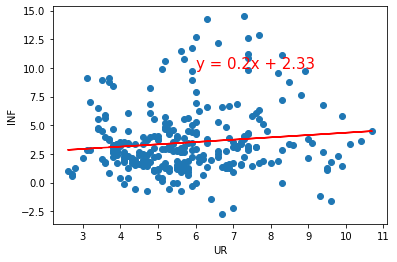

In [73]:
#Regression
x_values = merge_df3['UR']
y_values = merge_df3['INF']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('UR')
plt.ylabel('INF')
plt.show()

In [74]:
model=linregress(merge_df3['UR'],merge_df3['INF'])
model

LinregressResult(slope=0.20201524376945648, intercept=2.32730430081297, rvalue=0.11454134803529839, pvalue=0.05216461712935745, stderr=0.10360269927068544)

In [81]:
AL = fred.get_series('ALUR',frequency = 'q')
AL_df = {}
AL_df['ALUR'] = fred.get_series('ALUR',frequency = 'q')
AL_df = pd.DataFrame(AL_df)
AL_df.index.name = 'qtr_dt'
AL_df
AL_test_df = AL_df.reset_index()
AL_df

AK = fred.get_series('AKUR',frequency = 'q')
AK_df = {}
AK_df['AKUR'] = fred.get_series('AKUR',frequency = 'q')
AK_df = pd.DataFrame(AK_df)
AK_df.index.name = 'qtr_dt'
AK_df
AK_test_df = AK_df.reset_index()
AK_df

AZ = fred.get_series('AZUR',frequency = 'q')
AZ_df = {}
AZ_df['AZUR'] = fred.get_series('AZUR',frequency = 'q')
AZ_df = pd.DataFrame(AZ_df)
AZ_df.index.name = 'qtr_dt'
AZ_df
AZ_test_df = AZ_df.reset_index()
AZ_df

AR = fred.get_series('ARUR',frequency = 'q')
AR_df = {}
AR_df['ARUR'] = fred.get_series('ARUR',frequency = 'q')
AR_df = pd.DataFrame(AR_df)
AR_df.index.name = 'qtr_dt'
AR_df
AR_test_df = AR_df.reset_index()
AR_df

CA = fred.get_series('CAUR',frequency = 'q')
CA_df = {}
CA_df['CAUR'] = fred.get_series('CAUR',frequency = 'q')
CA_df = pd.DataFrame(CA_df)
CA_df.index.name = 'qtr_dt'
CA_df
CA_test_df = CA_df.reset_index()
CA_df

CO = fred.get_series('COUR',frequency = 'q')
CO_df = {}
CO_df['COUR'] = fred.get_series('COUR',frequency = 'q')
CO_df = pd.DataFrame(CO_df)
CO_df.index.name = 'qtr_dt'
CO_df
CO_test_df = CO_df.reset_index()
CO_df

CT = fred.get_series('CTUR',frequency = 'q')
CT_df = {}
CT_df['CTUR'] = fred.get_series('CTUR',frequency = 'q')
CT_df = pd.DataFrame(CT_df)
CT_df.index.name = 'qtr_dt'
CT_df
CT_test_df = CT_df.reset_index()
CT_df

DE = fred.get_series('DEUR',frequency = 'q')
DE_df = {}
DE_df['DEUR'] = fred.get_series('DEUR',frequency = 'q')
DE_df = pd.DataFrame(DE_df)
DE_df.index.name = 'qtr_dt'
DE_df
DE_test_df = DE_df.reset_index()
DE_df

FL = fred.get_series('FLUR',frequency = 'q')
FL_df = {}
FL_df['FLUR'] = fred.get_series('FLUR',frequency = 'q')
FL_df = pd.DataFrame(FL_df)
FL_df.index.name = 'qtr_dt'
FL_df
FL_test_df = FL_df.reset_index()
FL_df

GA = fred.get_series('GAUR',frequency = 'q')
GA_df = {}
GA_df['GAUR'] = fred.get_series('GAUR',frequency = 'q')
GA_df = pd.DataFrame(GA_df)
GA_df.index.name = 'qtr_dt'
GA_df
GA_test_df = GA_df.reset_index()
GA_df


HI = fred.get_series('HIUR',frequency = 'q')
HI_df = {}
HI_df['HIUR'] = fred.get_series('HIUR',frequency = 'q')
HI_df = pd.DataFrame(HI_df)
HI_df.index.name = 'qtr_dt'
HI_df
HI_test_df = HI_df.reset_index()
HI_df

ID = fred.get_series('IDUR',frequency = 'q')
ID_df = {}
ID_df['IDUR'] = fred.get_series('IDUR',frequency = 'q')
ID_df = pd.DataFrame(ID_df)
ID_df.index.name = 'qtr_dt'
ID_df
ID_test_df = ID_df.reset_index()
ID_df

IL = fred.get_series('ILUR',frequency = 'q')
IL_df = {}
IL_df['ILUR'] = fred.get_series('ILUR',frequency = 'q')
IL_df = pd.DataFrame(IL_df)
IL_df.index.name = 'qtr_dt'
IL_df
IL_test_df = IL_df.reset_index()
IL_df

IN = fred.get_series('INUR',frequency = 'q')
IN_df = {}
IN_df['INUR'] = fred.get_series('INUR',frequency = 'q')
IN_df = pd.DataFrame(IN_df)
IN_df.index.name = 'qtr_dt'
IN_df
IN_test_df = IN_df.reset_index()
IN_df

IA = fred.get_series('IAUR',frequency = 'q')
IA_df = {}
IA_df['IAUR'] = fred.get_series('IAUR',frequency = 'q')
IA_df = pd.DataFrame(IA_df)
IA_df.index.name = 'qtr_dt'
IA_df
IA_test_df = IA_df.reset_index()
IA_df

KS = fred.get_series('KSUR',frequency = 'q')
KS_df = {}
KS_df['KSUR'] = fred.get_series('KSUR',frequency = 'q')
KS_df = pd.DataFrame(KS_df)
KS_df.index.name = 'qtr_dt'
KS_df
KS_test_df = KS_df.reset_index()
KS_df

KY = fred.get_series('KYUR',frequency = 'q')
KY_df = {}
KY_df['KYUR'] = fred.get_series('KYUR',frequency = 'q')
KY_df = pd.DataFrame(KY_df)
KY_df.index.name = 'qtr_dt'
KY_df
KY_test_df = KY_df.reset_index()
KY_df

state1 = pd.merge(AL_df, AK_df, on="qtr_dt")
state2 = pd.merge(state1, AZ_df, on="qtr_dt")
state3 = pd.merge(state2, AR_df, on="qtr_dt")
state4 = pd.merge(state3, CA_df, on="qtr_dt")
state5 = pd.merge(state4, CO_df, on="qtr_dt")
state6 = pd.merge(state5, CT_df, on="qtr_dt")
state7 = pd.merge(state6, DE_df, on="qtr_dt")
state8 = pd.merge(state7, FL_df, on="qtr_dt")
state9 = pd.merge(state8, GA_df, on="qtr_dt")
state10= pd.merge(state9, HI_df, on="qtr_dt")
state11= pd.merge(state10, ID_df, on="qtr_dt")
state12= pd.merge(state11, IL_df, on="qtr_dt")
state13= pd.merge(state12, IN_df, on="qtr_dt")
state14= pd.merge(state13, IA_df, on="qtr_dt")
state15= pd.merge(state14, KS_df, on="qtr_dt")
state16= pd.merge(state15, KY_df, on="qtr_dt")
state16


,ALUR,AKUR,AZUR,ARUR,CAUR,COUR,CTUR,DEUR,FLUR,GAUR,HIUR,IDUR,ILUR,INUR,IAUR,KSUR,KYUR
qtr_dt,,,,,,,,,,,,,,,,,
1976-01-01,6.7,7.1,10.3,7.4,9.1,5.5,9.8,7.7,9.6,8.4,10.2,5.5,6.7,6.5,4.2,4.3,5.6
1976-04-01,6.5,7.0,9.8,7.2,8.9,5.5,9.6,8.4,9.1,8.1,9.9,5.6,6.5,6.0,4.0,4.2,5.5
1976-07-01,6.8,7.6,9.4,6.7,9.1,6.0,9.2,9.4,8.8,8.0,9.0,5.6,6.6,5.7,3.8,4.1,5.3
1976-10-01,7.2,8.4,9.3,6.6,9.3,6.3,8.5,9.8,9.0,8.2,8.5,5.7,6.5,5.8,3.9,4.2,5.1
1977-01-01,7.7,9.2,9.0,6.6,9.1,6.6,7.9,9.5,9.0,7.9,8.2,5.8,6.1,5.8,3.9,4.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-01,3.0,6.2,4.8,3.5,4.1,2.8,3.7,3.7,3.2,3.6,2.7,2.9,4.1,3.3,2.7,3.1,4.3
2019-07-01,2.8,6.2,4.6,3.6,3.9,2.6,3.7,3.9,3.0,3.3,2.7,2.9,3.8,3.2,2.8,3.1,4.3
2019-10-01,2.7,6.1,4.5,3.5,3.9,2.5,3.8,4.0,2.9,3.1,2.7,2.9,3.7,3.2,2.8,3.1,4.3


In [82]:
OH = fred.get_series('OHUR',frequency = 'q')
OH_df = {}
OH_df['OHUR'] = fred.get_series('OHUR',frequency = 'q')
OH_df = pd.DataFrame(OH_df)
OH_df.index.name = 'qtr_dt'
OH_df
OH_test_df = OH_df.reset_index()
OH_df
OK = fred.get_series('OKUR',frequency = 'q')
OK_df = {}
OK_df['OKUR'] = fred.get_series('OKUR',frequency = 'q')
OK_df = pd.DataFrame(OK_df)
OK_df.index.name = 'qtr_dt'
OK_df
OK_test_df = OK_df.reset_index()
OK_df
OR = fred.get_series('ORUR',frequency = 'q')
OR_df = {}
OR_df['ORUR'] = fred.get_series('ORUR',frequency = 'q')
OR_df = pd.DataFrame(OR_df)
OR_df.index.name = 'qtr_dt'
OR_df
OR_test_df = OR_df.reset_index()
OR_df
PA = fred.get_series('PAUR',frequency = 'q')
PA_df = {}
PA_df['PAUR'] = fred.get_series('PAUR',frequency = 'q')
PA_df = pd.DataFrame(PA_df)
PA_df.index.name = 'qtr_dt'
PA_df
PA_test_df = PA_df.reset_index()
PA_df
RI = fred.get_series('RIUR',frequency = 'q')
RI_df = {}
RI_df['RIUR'] = fred.get_series('RIUR',frequency = 'q')
RI_df = pd.DataFrame(RI_df)
RI_df.index.name = 'qtr_dt'
RI_df
RI_test_df = RI_df.reset_index()
RI_df
SC = fred.get_series('SCUR',frequency = 'q')
SC_df = {}
SC_df['SCUR'] = fred.get_series('SCUR',frequency = 'q')
SC_df = pd.DataFrame(SC_df)
SC_df.index.name = 'qtr_dt'
SC_df
SC_test_df = SC_df.reset_index()
SC_df
SD = fred.get_series('SDUR',frequency = 'q')
SD_df = {}
SD_df['SDUR'] = fred.get_series('SDUR',frequency = 'q')
SD_df = pd.DataFrame(SD_df)
SD_df.index.name = 'qtr_dt'
SD_df
SD_test_df = SD_df.reset_index()
SD_df
TN = fred.get_series('TNUR',frequency = 'q')
TN_df = {}
TN_df['TNUR'] = fred.get_series('TNUR',frequency = 'q')
TN_df = pd.DataFrame(TN_df)
TN_df.index.name = 'qtr_dt'
TN_df
TN_test_df = TN_df.reset_index()
TN_df
TX = fred.get_series('TXUR',frequency = 'q')
TX_df = {}
TX_df['TXUR'] = fred.get_series('TXUR',frequency = 'q')
TX_df = pd.DataFrame(TX_df)
TX_df.index.name = 'qtr_dt'
TX_df
TX_test_df = TX_df.reset_index()
TX_df
UT = fred.get_series('UTUR',frequency = 'q')
UT_df = {}
UT_df['UTUR'] = fred.get_series('UTUR',frequency = 'q')
UT_df = pd.DataFrame(UT_df)
UT_df.index.name = 'qtr_dt'
UT_df
UT_test_df = UT_df.reset_index()
UT_df
VT = fred.get_series('VTUR',frequency = 'q')
VT_df = {}
VT_df['VTUR'] = fred.get_series('VTUR',frequency = 'q')
VT_df = pd.DataFrame(VT_df)
VT_df.index.name = 'qtr_dt'
VT_df
VT_test_df = VT_df.reset_index()
VT_df
VA = fred.get_series('VAUR',frequency = 'q')
VA_df = {}
VA_df['VAUR'] = fred.get_series('VAUR',frequency = 'q')
VA_df = pd.DataFrame(VA_df)
VA_df.index.name = 'qtr_dt'
VA_df
VA_test_df = VA_df.reset_index()
VA_df
WA = fred.get_series('WAUR',frequency = 'q')
WA_df = {}
WA_df['WAUR'] = fred.get_series('WAUR',frequency = 'q')
WA_df = pd.DataFrame(WA_df)
WA_df.index.name = 'qtr_dt'
WA_df
WA_test_df = WA_df.reset_index()
WA_df
WV = fred.get_series('WVUR',frequency = 'q')
WV_df = {}
WV_df['WVUR'] = fred.get_series('WVUR',frequency = 'q')
WV_df = pd.DataFrame(WV_df)
WV_df.index.name = 'qtr_dt'
WV_df
WV_test_df = WV_df.reset_index()
WV_df
WI = fred.get_series('WIUR',frequency = 'q')
WI_df = {}
WI_df['WIUR'] = fred.get_series('WIUR',frequency = 'q')
WI_df = pd.DataFrame(WI_df)
WI_df.index.name = 'qtr_dt'
WI_df
WI_test_df = WI_df.reset_index()
WI_df
WY = fred.get_series('WYUR',frequency = 'q')
WY_df = {}
WY_df['WYUR'] = fred.get_series('WYUR',frequency = 'q')
WY_df = pd.DataFrame(WY_df)
WY_df.index.name = 'qtr_dt'
WY_df
WY_test_df = WY_df.reset_index()
WY_df


ste = pd.merge(OH_df, OK_df,on ="qtr_dt")
ste
ste1 = pd.merge(ste, OR_df,on ="qtr_dt")
ste1
ste2 = pd.merge(ste1, PA_df, on= "qtr_dt")
ste2
ste3 = pd.merge(ste2, RI_df, on= "qtr_dt")
ste3
ste4 = pd.merge(ste3, SC_df, on= "qtr_dt")
ste4
ste5 = pd.merge(ste4, SD_df, on= "qtr_dt")
ste5
ste6 = pd.merge(ste5, TN_df, on= "qtr_dt")
ste6
ste7 = pd.merge(ste6, TX_df, on= "qtr_dt")
ste7
ste8 = pd.merge(ste7, UT_df, on= "qtr_dt")
ste8
ste9 = pd.merge(ste8, VT_df, on= "qtr_dt")
ste9
ste10 = pd.merge(ste9, VA_df, on= "qtr_dt")
ste10
ste11 = pd.merge(ste10, WA_df, on= "qtr_dt")
ste11
ste12 = pd.merge(ste11, WV_df, on= "qtr_dt")
ste12
ste13 = pd.merge(ste12, WI_df, on= "qtr_dt")
ste13
ste14 = pd.merge(ste13, WY_df, on= "qtr_dt")
ste14



,OHUR,OKUR,ORUR,PAUR,RIUR,SCUR,SDUR,TNUR,TXUR,UTUR,VTUR,VAUR,WAUR,WVUR,WIUR,WYUR
qtr_dt,,,,,,,,,,,,,,,,
1976-01-01,8.1,5.9,9.7,8.1,8.1,7.6,3.2,6.0,5.9,5.8,8.7,5.9,8.7,7.9,5.8,4.1
1976-04-01,7.9,5.8,9.2,8.1,8.0,7.1,3.0,5.8,5.9,5.6,8.6,5.8,8.7,7.8,5.5,4.1
1976-07-01,7.5,5.6,9.1,7.8,8.2,6.9,3.2,6.0,5.7,5.5,8.2,5.8,8.9,7.0,5.4,3.9
1976-10-01,7.6,5.4,9.2,7.9,8.5,7.1,3.5,6.4,5.7,5.4,7.8,5.8,9.2,6.6,5.4,3.8
1977-01-01,7.4,5.4,8.9,8.0,8.5,7.3,3.6,6.6,5.6,5.4,7.6,5.8,9.3,6.9,5.4,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-01,4.1,3.2,3.9,4.2,3.6,3.1,3.3,3.5,3.4,2.7,2.3,2.8,4.4,4.7,3.3,3.5
2019-07-01,4.2,3.3,3.6,4.5,3.5,2.5,3.3,3.4,3.5,2.5,2.4,2.7,4.2,4.9,3.4,3.7
2019-10-01,4.1,3.4,3.4,4.6,3.5,2.4,3.4,3.3,3.5,2.4,2.4,2.7,4.0,5.1,3.5,3.7


In [92]:
states_df = pd.merge (ste14, state16 , on = "qtr_dt")
states_df

,OHUR,OKUR,ORUR,PAUR,RIUR,SCUR,SDUR,TNUR,TXUR,UTUR,...,DEUR,FLUR,GAUR,HIUR,IDUR,ILUR,INUR,IAUR,KSUR,KYUR
qtr_dt,,,,,,,,,,,,,,,,,,,,,
1976-01-01,8.1,5.9,9.7,8.1,8.1,7.6,3.2,6.0,5.9,5.8,...,7.7,9.6,8.4,10.2,5.5,6.7,6.5,4.2,4.3,5.6
1976-04-01,7.9,5.8,9.2,8.1,8.0,7.1,3.0,5.8,5.9,5.6,...,8.4,9.1,8.1,9.9,5.6,6.5,6.0,4.0,4.2,5.5
1976-07-01,7.5,5.6,9.1,7.8,8.2,6.9,3.2,6.0,5.7,5.5,...,9.4,8.8,8.0,9.0,5.6,6.6,5.7,3.8,4.1,5.3
1976-10-01,7.6,5.4,9.2,7.9,8.5,7.1,3.5,6.4,5.7,5.4,...,9.8,9.0,8.2,8.5,5.7,6.5,5.8,3.9,4.2,5.1
1977-01-01,7.4,5.4,8.9,8.0,8.5,7.3,3.6,6.6,5.6,5.4,...,9.5,9.0,7.9,8.2,5.8,6.1,5.8,3.9,4.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-01,4.1,3.2,3.9,4.2,3.6,3.1,3.3,3.5,3.4,2.7,...,3.7,3.2,3.6,2.7,2.9,4.1,3.3,2.7,3.1,4.3
2019-07-01,4.2,3.3,3.6,4.5,3.5,2.5,3.3,3.4,3.5,2.5,...,3.9,3.0,3.3,2.7,2.9,3.8,3.2,2.8,3.1,4.3
2019-10-01,4.1,3.4,3.4,4.6,3.5,2.4,3.4,3.3,3.5,2.4,...,4.0,2.9,3.1,2.7,2.9,3.7,3.2,2.8,3.1,4.3


In [95]:
LA = fred.get_series('LAUR',frequency = 'q')
LA_df = {}
LA_df['LAUR'] = fred.get_series('LAUR',frequency = 'q')
LA_df = pd.DataFrame(LA_df)
LA_df.index.name = 'qtr_dt'
LA_df
LA_test_df = LA_df.reset_index()
LA_df

,LAUR
qtr_dt,
1976-01-01,6.3
1976-04-01,6.6
1976-07-01,7.0
1976-10-01,7.0
1977-01-01,7.0
...,...
2019-04-01,4.5
2019-07-01,4.9
2019-10-01,5.2


In [98]:


ME = fred.get_series('MEUR',frequency = 'q')
ME_df = {}
ME_df['MEUR'] = fred.get_series('MEUR',frequency = 'q')
ME_df = pd.DataFrame(ME_df)
ME_df.index.name = 'qtr_dt'
ME_df
ME_test_df = ME_df.reset_index()
ME_df

state_1 = pd.merge(LA_df, ME_df, on="qtr_dt")




In [101]:
state_1 = pd.merge(LA_df, ME_df, on="qtr_dt")
state_1

,LAUR,MEUR
qtr_dt,,
1976-01-01,6.3,8.8
1976-04-01,6.6,8.6
1976-07-01,7.0,8.5
1976-10-01,7.0,8.8
1977-01-01,7.0,8.9
...,...,...
2019-04-01,4.5,3.0
2019-07-01,4.9,2.9
2019-10-01,5.2,3.0


In [102]:


MD = fred.get_series('MDUR',frequency = 'q')
MD_df = {}
MD_df['MDUR'] = fred.get_series('MDUR',frequency = 'q')
MD_df = pd.DataFrame(MD_df)
MD_df.index.name = 'qtr_dt'
MD_df
MD_test_df = MD_df.reset_index()
MD_df


state_2 = pd.merge(state_1, MD_df, on="qtr_dt")
state_2

,LAUR,MEUR,MDUR
qtr_dt,,,
1976-01-01,6.3,8.8,6.5
1976-04-01,6.6,8.6,6.6
1976-07-01,7.0,8.5,6.7
1976-10-01,7.0,8.8,6.8
1977-01-01,7.0,8.9,6.7
...,...,...,...
2019-04-01,4.5,3.0,3.7
2019-07-01,4.9,2.9,3.6
2019-10-01,5.2,3.0,3.4


In [103]:



MI = fred.get_series('MIUR',frequency = 'q')
MI_df = {}
MI_df['MIUR'] = fred.get_series('MIUR',frequency = 'q')
MI_df = pd.DataFrame(MI_df)
MI_df.index.name = 'qtr_dt'
MI_df
MI_test_df = MI_df.reset_index()
MI_df

state_3 = pd.merge(state_2, MI_df, on="qtr_dt")
state_3

,LAUR,MEUR,MDUR,MIUR
qtr_dt,,,,
1976-01-01,6.3,8.8,6.5,9.9
1976-04-01,6.6,8.6,6.6,9.6
1976-07-01,7.0,8.5,6.7,9.1
1976-10-01,7.0,8.8,6.8,9.0
1977-01-01,7.0,8.9,6.7,8.8
...,...,...,...,...
2019-04-01,4.5,3.0,3.7,4.2
2019-07-01,4.9,2.9,3.6,4.0
2019-10-01,5.2,3.0,3.4,3.9


In [104]:


MN = fred.get_series('MNUR',frequency = 'q')
MN_df = {}
MN_df['MNUR'] = fred.get_series('MNUR',frequency = 'q')
MN_df = pd.DataFrame(MN_df)
MN_df.index.name = 'qtr_dt'
MN_df
MN_test_df = MN_df.reset_index()
MN_df

state_4 = pd.merge(state_3,MN_df,on="qtr_dt")
state_4



,LAUR,MEUR,MDUR,MIUR,MNUR
qtr_dt,,,,,
1976-01-01,6.3,8.8,6.5,9.9,6.0
1976-04-01,6.6,8.6,6.6,9.6,5.7
1976-07-01,7.0,8.5,6.7,9.1,5.7
1976-10-01,7.0,8.8,6.8,9.0,5.9
1977-01-01,7.0,8.9,6.7,8.8,5.8
...,...,...,...,...,...
2019-04-01,4.5,3.0,3.7,4.2,3.2
2019-07-01,4.9,2.9,3.6,4.0,3.2
2019-10-01,5.2,3.0,3.4,3.9,3.3


In [105]:



MS = fred.get_series('MSUR',frequency = 'q')
MS_df = {}
MS_df['MSUR'] = fred.get_series('MSUR',frequency = 'q')
MS_df = pd.DataFrame(MS_df)
MS_df.index.name = 'qtr_dt'
MS_df
MS_test_df = MS_df.reset_index()
MS_df

state_5 = pd.merge(state_4,MS_df,on="qtr_dt")
state_5

,LAUR,MEUR,MDUR,MIUR,MNUR,MSUR
qtr_dt,,,,,,
1976-01-01,6.3,8.8,6.5,9.9,6.0,6.7
1976-04-01,6.6,8.6,6.6,9.6,5.7,6.3
1976-07-01,7.0,8.5,6.7,9.1,5.7,6.4
1976-10-01,7.0,8.8,6.8,9.0,5.9,6.7
1977-01-01,7.0,8.9,6.7,8.8,5.8,7.1
...,...,...,...,...,...,...
2019-04-01,4.5,3.0,3.7,4.2,3.2,5.4
2019-07-01,4.9,2.9,3.6,4.0,3.2,5.5
2019-10-01,5.2,3.0,3.4,3.9,3.3,5.6


In [106]:


MO = fred.get_series('MOUR',frequency = 'q')
MO_df = {}
MO_df['MOUR'] = fred.get_series('MOUR',frequency = 'q')
MO_df = pd.DataFrame(MO_df)
MO_df.index.name = 'qtr_dt'
MO_df
MO_test_df = MO_df.reset_index()
MO_df

state_6 = pd.merge(state_5,MO_df,on="qtr_dt")
state_6

,LAUR,MEUR,MDUR,MIUR,MNUR,MSUR,MOUR
qtr_dt,,,,,,,
1976-01-01,6.3,8.8,6.5,9.9,6.0,6.7,6.0
1976-04-01,6.6,8.6,6.6,9.6,5.7,6.3,6.1
1976-07-01,7.0,8.5,6.7,9.1,5.7,6.4,6.3
1976-10-01,7.0,8.8,6.8,9.0,5.9,6.7,6.6
1977-01-01,7.0,8.9,6.7,8.8,5.8,7.1,6.4
...,...,...,...,...,...,...,...
2019-04-01,4.5,3.0,3.7,4.2,3.2,5.4,3.1
2019-07-01,4.9,2.9,3.6,4.0,3.2,5.5,3.2
2019-10-01,5.2,3.0,3.4,3.9,3.3,5.6,3.4


In [107]:


MT = fred.get_series('MTUR',frequency = 'q')
MT_df = {}
MT_df['MTUR'] = fred.get_series('MTUR',frequency = 'q')
MT_df = pd.DataFrame(MT_df)
MT_df.index.name = 'qtr_dt'
MT_df
MT_test_df = MT_df.reset_index()
MT_df

state_7 = pd.merge(state_6,MT_df,on="qtr_dt")
state_7

,LAUR,MEUR,MDUR,MIUR,MNUR,MSUR,MOUR,MTUR
qtr_dt,,,,,,,,
1976-01-01,6.3,8.8,6.5,9.9,6.0,6.7,6.0,5.9
1976-04-01,6.6,8.6,6.6,9.6,5.7,6.3,6.1,5.9
1976-07-01,7.0,8.5,6.7,9.1,5.7,6.4,6.3,6.0
1976-10-01,7.0,8.8,6.8,9.0,5.9,6.7,6.6,6.0
1977-01-01,7.0,8.9,6.7,8.8,5.8,7.1,6.4,6.1
...,...,...,...,...,...,...,...,...
2019-04-01,4.5,3.0,3.7,4.2,3.2,5.4,3.1,3.5
2019-07-01,4.9,2.9,3.6,4.0,3.2,5.5,3.2,3.5
2019-10-01,5.2,3.0,3.4,3.9,3.3,5.6,3.4,3.5


In [109]:



ND = fred.get_series('NDUR',frequency = 'q')
ND_df = {}
ND_df['NDUR'] = fred.get_series('NDUR',frequency = 'q')
ND_df = pd.DataFrame(ND_df)
ND_df.index.name = 'qtr_dt'
ND_df
ND_test_df = ND_df.reset_index()
ND_df

state_8 = pd.merge(state_7,ND_df,on="qtr_dt")
state_8

,LAUR,MEUR,MDUR,MIUR,MNUR,MSUR,MOUR,MTUR,NDUR
qtr_dt,,,,,,,,,
1976-01-01,6.3,8.8,6.5,9.9,6.0,6.7,6.0,5.9,3.3
1976-04-01,6.6,8.6,6.6,9.6,5.7,6.3,6.1,5.9,3.5
1976-07-01,7.0,8.5,6.7,9.1,5.7,6.4,6.3,6.0,3.9
1976-10-01,7.0,8.8,6.8,9.0,5.9,6.7,6.6,6.0,4.1
1977-01-01,7.0,8.9,6.7,8.8,5.8,7.1,6.4,6.1,4.4
...,...,...,...,...,...,...,...,...,...
2019-04-01,4.5,3.0,3.7,4.2,3.2,5.4,3.1,3.5,2.4
2019-07-01,4.9,2.9,3.6,4.0,3.2,5.5,3.2,3.5,2.4
2019-10-01,5.2,3.0,3.4,3.9,3.3,5.6,3.4,3.5,2.4


In [110]:

NE = fred.get_series('NeUR',frequency = 'q')
NE_df = {}
NE_df['NEUR'] = fred.get_series('NEUR',frequency = 'q')
NE_df = pd.DataFrame(AL_df)
NE_df.index.name = 'qtr_dt'
NE_df
NE_test_df = NE_df.reset_index()
NE_df

state_9 = pd.merge(state_8,NE_df,on="qtr_dt")
state_9



,LAUR,MEUR,MDUR,MIUR,MNUR,MSUR,MOUR,MTUR,NDUR,ALUR
qtr_dt,,,,,,,,,,
1976-01-01,6.3,8.8,6.5,9.9,6.0,6.7,6.0,5.9,3.3,6.7
1976-04-01,6.6,8.6,6.6,9.6,5.7,6.3,6.1,5.9,3.5,6.5
1976-07-01,7.0,8.5,6.7,9.1,5.7,6.4,6.3,6.0,3.9,6.8
1976-10-01,7.0,8.8,6.8,9.0,5.9,6.7,6.6,6.0,4.1,7.2
1977-01-01,7.0,8.9,6.7,8.8,5.8,7.1,6.4,6.1,4.4,7.7
...,...,...,...,...,...,...,...,...,...,...
2019-04-01,4.5,3.0,3.7,4.2,3.2,5.4,3.1,3.5,2.4,3.0
2019-07-01,4.9,2.9,3.6,4.0,3.2,5.5,3.2,3.5,2.4,2.8
2019-10-01,5.2,3.0,3.4,3.9,3.3,5.6,3.4,3.5,2.4,2.7


In [111]:

NV = fred.get_series('NVUR',frequency = 'q')
NV_df = {}
NV_df['NVUR'] = fred.get_series('NVUR',frequency = 'q')
NV_df = pd.DataFrame(NV_df)
NV_df.index.name = 'qtr_dt'
NV_df
NV_test_df = NV_df.reset_index()
NV_df

state_10 = pd.merge(state_9,NV_df,on="qtr_dt")
state_10



,LAUR,MEUR,MDUR,MIUR,MNUR,MSUR,MOUR,MTUR,NDUR,ALUR,NVUR
qtr_dt,,,,,,,,,,,
1976-01-01,6.3,8.8,6.5,9.9,6.0,6.7,6.0,5.9,3.3,6.7,9.0
1976-04-01,6.6,8.6,6.6,9.6,5.7,6.3,6.1,5.9,3.5,6.5,8.8
1976-07-01,7.0,8.5,6.7,9.1,5.7,6.4,6.3,6.0,3.9,6.8,8.6
1976-10-01,7.0,8.8,6.8,9.0,5.9,6.7,6.6,6.0,4.1,7.2,8.7
1977-01-01,7.0,8.9,6.7,8.8,5.8,7.1,6.4,6.1,4.4,7.7,8.2
...,...,...,...,...,...,...,...,...,...,...,...
2019-04-01,4.5,3.0,3.7,4.2,3.2,5.4,3.1,3.5,2.4,3.0,4.0
2019-07-01,4.9,2.9,3.6,4.0,3.2,5.5,3.2,3.5,2.4,2.8,3.8
2019-10-01,5.2,3.0,3.4,3.9,3.3,5.6,3.4,3.5,2.4,2.7,3.7


In [112]:


NH = fred.get_series('NHUR',frequency = 'q')
NH_df = {}
NH_df['NHUR'] = fred.get_series('NHUR',frequency = 'q')
NH_df = pd.DataFrame(NH_df)
NH_df.index.name = 'qtr_dt'
NH_df
NH_test_df = NH_df.reset_index()
NH_df

state_11 = pd.merge(state_10,NH_df,on="qtr_dt")
state_11

,LAUR,MEUR,MDUR,MIUR,MNUR,MSUR,MOUR,MTUR,NDUR,ALUR,NVUR,NHUR
qtr_dt,,,,,,,,,,,,
1976-01-01,6.3,8.8,6.5,9.9,6.0,6.7,6.0,5.9,3.3,6.7,9.0,6.8
1976-04-01,6.6,8.6,6.6,9.6,5.7,6.3,6.1,5.9,3.5,6.5,8.8,6.6
1976-07-01,7.0,8.5,6.7,9.1,5.7,6.4,6.3,6.0,3.9,6.8,8.6,6.3
1976-10-01,7.0,8.8,6.8,9.0,5.9,6.7,6.6,6.0,4.1,7.2,8.7,6.3
1977-01-01,7.0,8.9,6.7,8.8,5.8,7.1,6.4,6.1,4.4,7.7,8.2,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-01,4.5,3.0,3.7,4.2,3.2,5.4,3.1,3.5,2.4,3.0,4.0,2.5
2019-07-01,4.9,2.9,3.6,4.0,3.2,5.5,3.2,3.5,2.4,2.8,3.8,2.6
2019-10-01,5.2,3.0,3.4,3.9,3.3,5.6,3.4,3.5,2.4,2.7,3.7,2.6


In [113]:


NJ = fred.get_series('NJUR',frequency = 'q')
NJ_df = {}
NJ_df['NJUR'] = fred.get_series('NJUR',frequency = 'q')
NJ_df = pd.DataFrame(NJ_df)
NJ_df.index.name = 'qtr_dt'
NJ_df
NJ_test_df = NJ_df.reset_index()
NJ_df

state_12 = pd.merge(state_11, NJ_df, on = "qtr_dt")
state_12


,LAUR,MEUR,MDUR,MIUR,MNUR,MSUR,MOUR,MTUR,NDUR,ALUR,NVUR,NHUR,NJUR
qtr_dt,,,,,,,,,,,,,
1976-01-01,6.3,8.8,6.5,9.9,6.0,6.7,6.0,5.9,3.3,6.7,9.0,6.8,10.2
1976-04-01,6.6,8.6,6.6,9.6,5.7,6.3,6.1,5.9,3.5,6.5,8.8,6.6,10.3
1976-07-01,7.0,8.5,6.7,9.1,5.7,6.4,6.3,6.0,3.9,6.8,8.6,6.3,10.5
1976-10-01,7.0,8.8,6.8,9.0,5.9,6.7,6.6,6.0,4.1,7.2,8.7,6.3,10.7
1977-01-01,7.0,8.9,6.7,8.8,5.8,7.1,6.4,6.1,4.4,7.7,8.2,6.2,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-01,4.5,3.0,3.7,4.2,3.2,5.4,3.1,3.5,2.4,3.0,4.0,2.5,3.3
2019-07-01,4.9,2.9,3.6,4.0,3.2,5.5,3.2,3.5,2.4,2.8,3.8,2.6,3.5
2019-10-01,5.2,3.0,3.4,3.9,3.3,5.6,3.4,3.5,2.4,2.7,3.7,2.6,3.7


In [114]:


NM = fred.get_series('NMUR',frequency = 'q')
NM_df = {}
NM_df['NMUR'] = fred.get_series('NMUR',frequency = 'q')
NM_df = pd.DataFrame(NM_df)
NM_df.index.name = 'qtr_dt'
NM_df
NM_test_df = NM_df.reset_index()
NM_df

state_13 = pd.merge(state_12,NM_df,on="qtr_dt")
state_13


,LAUR,MEUR,MDUR,MIUR,MNUR,MSUR,MOUR,MTUR,NDUR,ALUR,NVUR,NHUR,NJUR,NMUR
qtr_dt,,,,,,,,,,,,,,
1976-01-01,6.3,8.8,6.5,9.9,6.0,6.7,6.0,5.9,3.3,6.7,9.0,6.8,10.2,8.9
1976-04-01,6.6,8.6,6.6,9.6,5.7,6.3,6.1,5.9,3.5,6.5,8.8,6.6,10.3,8.9
1976-07-01,7.0,8.5,6.7,9.1,5.7,6.4,6.3,6.0,3.9,6.8,8.6,6.3,10.5,8.9
1976-10-01,7.0,8.8,6.8,9.0,5.9,6.7,6.6,6.0,4.1,7.2,8.7,6.3,10.7,8.9
1977-01-01,7.0,8.9,6.7,8.8,5.8,7.1,6.4,6.1,4.4,7.7,8.2,6.2,10.5,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-01,4.5,3.0,3.7,4.2,3.2,5.4,3.1,3.5,2.4,3.0,4.0,2.5,3.3,4.9
2019-07-01,4.9,2.9,3.6,4.0,3.2,5.5,3.2,3.5,2.4,2.8,3.8,2.6,3.5,4.8
2019-10-01,5.2,3.0,3.4,3.9,3.3,5.6,3.4,3.5,2.4,2.7,3.7,2.6,3.7,4.8


In [115]:


NY = fred.get_series('NYUR',frequency = 'q')
NY_df = {}
NY_df['NYUR'] = fred.get_series('NYUR',frequency = 'q')
NY_df = pd.DataFrame(NY_df)
NY_df.index.name = 'qtr_dt'
NY_df
NY_test_df = NY_df.reset_index()
NY_df

state_14 = pd.merge(state_13,NY_df,on="qtr_dt")
state_14


,LAUR,MEUR,MDUR,MIUR,MNUR,MSUR,MOUR,MTUR,NDUR,ALUR,NVUR,NHUR,NJUR,NMUR,NYUR
qtr_dt,,,,,,,,,,,,,,,
1976-01-01,6.3,8.8,6.5,9.9,6.0,6.7,6.0,5.9,3.3,6.7,9.0,6.8,10.2,8.9,10.3
1976-04-01,6.6,8.6,6.6,9.6,5.7,6.3,6.1,5.9,3.5,6.5,8.8,6.6,10.3,8.9,10.2
1976-07-01,7.0,8.5,6.7,9.1,5.7,6.4,6.3,6.0,3.9,6.8,8.6,6.3,10.5,8.9,10.2
1976-10-01,7.0,8.8,6.8,9.0,5.9,6.7,6.6,6.0,4.1,7.2,8.7,6.3,10.7,8.9,10.2
1977-01-01,7.0,8.9,6.7,8.8,5.8,7.1,6.4,6.1,4.4,7.7,8.2,6.2,10.5,8.6,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-01,4.5,3.0,3.7,4.2,3.2,5.4,3.1,3.5,2.4,3.0,4.0,2.5,3.3,4.9,4.0
2019-07-01,4.9,2.9,3.6,4.0,3.2,5.5,3.2,3.5,2.4,2.8,3.8,2.6,3.5,4.8,3.9
2019-10-01,5.2,3.0,3.4,3.9,3.3,5.6,3.4,3.5,2.4,2.7,3.7,2.6,3.7,4.8,3.9


In [117]:


NC = fred.get_series('NCUR',frequency = 'q')
NC_df = {}
NC_df['NCUR'] = fred.get_series('NCUR',frequency = 'q')
NC_df = pd.DataFrame(NC_df)
NC_df.index.name = 'qtr_dt'
NC_df
NC_test_df = NC_df.reset_index()
NC_df

state_15 = pd.merge(state_14,NC_df, on="qtr_dt")
state_15

,LAUR,MEUR,MDUR,MIUR,MNUR,MSUR,MOUR,MTUR,NDUR,ALUR,NVUR,NHUR,NJUR,NMUR,NYUR,NCUR
qtr_dt,,,,,,,,,,,,,,,,
1976-01-01,6.3,8.8,6.5,9.9,6.0,6.7,6.0,5.9,3.3,6.7,9.0,6.8,10.2,8.9,10.3,6.5
1976-04-01,6.6,8.6,6.6,9.6,5.7,6.3,6.1,5.9,3.5,6.5,8.8,6.6,10.3,8.9,10.2,6.1
1976-07-01,7.0,8.5,6.7,9.1,5.7,6.4,6.3,6.0,3.9,6.8,8.6,6.3,10.5,8.9,10.2,6.0
1976-10-01,7.0,8.8,6.8,9.0,5.9,6.7,6.6,6.0,4.1,7.2,8.7,6.3,10.7,8.9,10.2,6.3
1977-01-01,7.0,8.9,6.7,8.8,5.8,7.1,6.4,6.1,4.4,7.7,8.2,6.2,10.5,8.6,9.9,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-01,4.5,3.0,3.7,4.2,3.2,5.4,3.1,3.5,2.4,3.0,4.0,2.5,3.3,4.9,4.0,4.0
2019-07-01,4.9,2.9,3.6,4.0,3.2,5.5,3.2,3.5,2.4,2.8,3.8,2.6,3.5,4.8,3.9,3.8
2019-10-01,5.2,3.0,3.4,3.9,3.3,5.6,3.4,3.5,2.4,2.7,3.7,2.6,3.7,4.8,3.9,3.6


In [118]:


MA = fred.get_series('MAUR',frequency = 'q')
MA_df = {}
MA_df['MAUR'] = fred.get_series('MAUR',frequency = 'q')
MA_df = pd.DataFrame(MA_df)
MA_df.index.name = 'qtr_dt'
MS_df
MA_test_df = MA_df.reset_index()
MA_df

state_16 = pd.merge(state_15,MA_df,on="qtr_dt")
state_16


,LAUR,MEUR,MDUR,MIUR,MNUR,MSUR,MOUR,MTUR,NDUR,ALUR,NVUR,NHUR,NJUR,NMUR,NYUR,NCUR,MAUR
qtr_dt,,,,,,,,,,,,,,,,,
1976-01-01,6.3,8.8,6.5,9.9,6.0,6.7,6.0,5.9,3.3,6.7,9.0,6.8,10.2,8.9,10.3,6.5,10.3
1976-04-01,6.6,8.6,6.6,9.6,5.7,6.3,6.1,5.9,3.5,6.5,8.8,6.6,10.3,8.9,10.2,6.1,9.9
1976-07-01,7.0,8.5,6.7,9.1,5.7,6.4,6.3,6.0,3.9,6.8,8.6,6.3,10.5,8.9,10.2,6.0,9.2
1976-10-01,7.0,8.8,6.8,9.0,5.9,6.7,6.6,6.0,4.1,7.2,8.7,6.3,10.7,8.9,10.2,6.3,8.8
1977-01-01,7.0,8.9,6.7,8.8,5.8,7.1,6.4,6.1,4.4,7.7,8.2,6.2,10.5,8.6,9.9,6.3,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-01,4.5,3.0,3.7,4.2,3.2,5.4,3.1,3.5,2.4,3.0,4.0,2.5,3.3,4.9,4.0,4.0,2.9
2019-07-01,4.9,2.9,3.6,4.0,3.2,5.5,3.2,3.5,2.4,2.8,3.8,2.6,3.5,4.8,3.9,3.8,2.8
2019-10-01,5.2,3.0,3.4,3.9,3.3,5.6,3.4,3.5,2.4,2.7,3.7,2.6,3.7,4.8,3.9,3.6,2.8


In [120]:
final_df = pd.merge(states_df,state_16,on="qtr_dt")
final_df

,OHUR,OKUR,ORUR,PAUR,RIUR,SCUR,SDUR,TNUR,TXUR,UTUR,...,MTUR,NDUR,ALUR_y,NVUR,NHUR,NJUR,NMUR,NYUR,NCUR,MAUR
qtr_dt,,,,,,,,,,,,,,,,,,,,,
1976-01-01,8.1,5.9,9.7,8.1,8.1,7.6,3.2,6.0,5.9,5.8,...,5.9,3.3,6.7,9.0,6.8,10.2,8.9,10.3,6.5,10.3
1976-04-01,7.9,5.8,9.2,8.1,8.0,7.1,3.0,5.8,5.9,5.6,...,5.9,3.5,6.5,8.8,6.6,10.3,8.9,10.2,6.1,9.9
1976-07-01,7.5,5.6,9.1,7.8,8.2,6.9,3.2,6.0,5.7,5.5,...,6.0,3.9,6.8,8.6,6.3,10.5,8.9,10.2,6.0,9.2
1976-10-01,7.6,5.4,9.2,7.9,8.5,7.1,3.5,6.4,5.7,5.4,...,6.0,4.1,7.2,8.7,6.3,10.7,8.9,10.2,6.3,8.8
1977-01-01,7.4,5.4,8.9,8.0,8.5,7.3,3.6,6.6,5.6,5.4,...,6.1,4.4,7.7,8.2,6.2,10.5,8.6,9.9,6.3,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-01,4.1,3.2,3.9,4.2,3.6,3.1,3.3,3.5,3.4,2.7,...,3.5,2.4,3.0,4.0,2.5,3.3,4.9,4.0,4.0,2.9
2019-07-01,4.2,3.3,3.6,4.5,3.5,2.5,3.3,3.4,3.5,2.5,...,3.5,2.4,2.8,3.8,2.6,3.5,4.8,3.9,3.8,2.8
2019-10-01,4.1,3.4,3.4,4.6,3.5,2.4,3.4,3.3,3.5,2.4,...,3.5,2.4,2.7,3.7,2.6,3.7,4.8,3.9,3.6,2.8


In [136]:
UR = 'https://raw.githubusercontent.com/kanikajain1/Project1/taurean_branch/Phil/UR.csv'
df = pd.read_csv(UR)
df.head()



,code,state,category,UR
0,AL,Alabama,state,7.5
1,AK,Alaska,state,12.4
2,AZ,Arizona,state,10.0
3,AR,Arkansas,state,8.0
4,CA,California,state,14.9


In [137]:
layout = dict(Title='Unemployment By State',
             geo = dict(scope='usa', projection = dict(type = 'albers usa'), showlakes = True,lakecolor='rgb(66,165,245)',),)
layout

{'Title': 'Unemployment By State',
 'geo': {'scope': 'usa',
  'projection': {'type': 'albers usa'},
  'showlakes': True,
  'lakecolor': 'rgb(66,165,245)'}}

In [149]:
df['text'] = 'UR'+df['UR'].astype(str) + 'state' + df['state'].astype(str) 
'State' + df['code']

data = [dict(type='chloropleth',autocolorscale=False,locations = df['code'], z = df['UR'], locationmode='USA-states',
             text = df['text'], colorscale = 'custom-colorscale',colorbar=dict(title = "Unemployment"))]
data

[{'type': 'chloropleth',
  'autocolorscale': False,
  'locations': 0     AL
  1     AK
  2     AZ
  3     AR
  4     CA
  5     CO
  6     CT
  7     DE
  8     FL
  9     GA
  10    HI
  11    ID
  12    IL
  13    IN
  14    IA
  15    KS
  16    KY
  17    LA
  18    ME
  19    MD
  20    MA
  21    MI
  22    MN
  23    MS
  24    MO
  25    MT
  26    NE
  27    NV
  28    NH
  29    NJ
  30    NM
  31    NY
  32    NC
  33    ND
  34    OH
  35    OK
  36    OR
  37    PA
  38    RI
  39    SC
  40    SD
  41    TN
  42    TX
  43    UT
  44    VT
  45    VA
  46    WA
  47    WV
  48    WI
  49    WY
  Name: code, dtype: object,
  'z': 0      7.5
  1     12.4
  2     10.0
  3      8.0
  4     14.9
  5     10.5
  6      9.8
  7     12.5
  8     10.4
  9      7.6
  10    13.9
  11     5.6
  12    14.6
  13    11.2
  14     8.0
  15     7.5
  16     4.3
  17     9.7
  18     6.6
  19     NaN
  20     NaN
  21    14.8
  22     8.6
  23     8.7
  24     7.9
  25     7.1
  26     6.7


In [152]:
layout = dict(Title='Unemployment By State',
             geo = dict(scope='usa', projection = dict(type = 'albers usa'), showlakes = True,lakecolor='rgb(66,165,245)',),)
layout

{'Title': 'Unemployment By State',
 'geo': {'scope': 'usa',
  'projection': {'type': 'albers usa'},
  'showlakes': True,
  'lakecolor': 'rgb(66,165,245)'}}

In [159]:

fig = dict(data=data,layout = layout)
py.iplot(fig,filename ='d3-chloropleth-map')


AttributeError: module 'plotly' has no attribute 'iplot'